In [ ]:
import pandas as pd

In [33]:
X = pd.read_csv('static/trainX.csv')
y = pd.read_csv('static/trainY.csv')
X.keys()

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')

# Identify bias

### number of man is much greater than number of woman

In [34]:
def detect_bias(attribute, titanic_df):
    # Calculate the distribution of the attribute
    attribute_distribution = titanic_df[attribute].value_counts(normalize=True)
    
    # Print the distribution
    print("Distribution of", attribute, ":\n", attribute_distribution)
    
    # Check if there's a significant imbalance
    if len(attribute_distribution) == 2:
        imbalance_ratio = attribute_distribution.iloc[0] / attribute_distribution.iloc[1]
        if imbalance_ratio > 1.5 or imbalance_ratio < 0.5:
            print("Warning: Significant imbalance detected in", attribute)
        else:
            print("No significant imbalance detected in", attribute)
    else:
        print("Attribute has more than two categories, additional analysis may be required.")

detect_bias ('Sex', X)

Distribution of Sex :
 Sex
1    0.647587
0    0.352413
Name: proportion, dtype: float64


### age distribution is much focused on young age

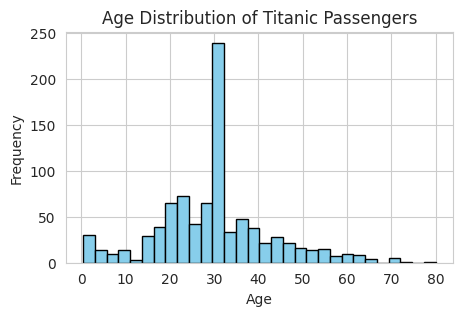

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_df = X

# Filter out missing values in the Age column
age_data = titanic_df['Age'].dropna()

# Plot the histogram
plt.figure(figsize=(5, 3))
plt.hist(age_data, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Titanic Passengers')
plt.grid(True)
plt.show()

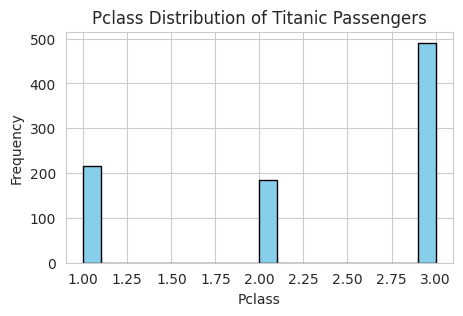

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_df = X

# Filter out missing values in the Age column
age_data = titanic_df['Pclass'].dropna()

# Plot the histogram
plt.figure(figsize=(5, 3))
plt.hist([age_data], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title('Pclass Distribution of Titanic Passengers')
plt.grid(True)
plt.show()

### man has much lower survive rate

In [ ]:
manCount = 0
womanCount = 0
manSurvived = 0
womanSurvived = 0

def checkSurvive(idx):
    if y.iloc[idx]['Survived'] == 1:
        return 1
    else:
        return 0

for idx in range(X.shape[0]):
    row = X.iloc[idx]
    if row['Sex'] == 1: ###man
        manCount += 1
        manSurvived += checkSurvive(idx)
    else: ### woman
        womanCount += 1
        womanSurvived += checkSurvive(idx)     

print(f"남자 생존 비율 : {manSurvived/manCount} 여자 생존 비율 : {womanSurvived/womanCount}")   

In [ ]:
import numpy as np

bin = 10

ageCount = [0 for i in range (0, bin)]
surviveCount = [0 for i in range (0, bin)]
result = [0 for i in range (0, bin)]

ages = X['Age']
for idx in range(len(ages)):
    if not np.isnan(ages[idx]):
        age = int(ages[idx]//bin)
        ageCount[age] += 1
        surviveCount[age] += checkSurvive(idx)

for i in range(bin):
    if ageCount[i] != 0:
        # print(f"number of age {bin*(i)} ~ {bin*(i+1)} is {ageCount[i]} and survive rate is {surviveCount[i] / ageCount[i]}")
        result[i] = surviveCount[i] / ageCount[i]

print(result)

x_ticks_labels = [f'{i * bin}-{(i + 1) * bin}' for i in range(bin)]
plt.figure(figsize=(5, 3))
plt.hist([i for i in range(len(result))], bins=10, weights=result, color='skyblue', edgecolor='black')
plt.xlabel('survive rate')
plt.ylabel('Frequency')
plt.title('survive rate Distribution of Titanic Passengers')
plt.grid(True)
plt.show()

### dead rate is larger than live

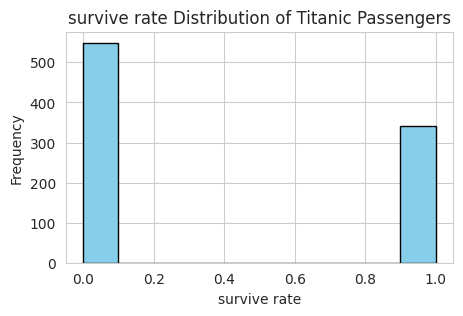

In [57]:
plt.figure(figsize=(5, 3))
plt.hist(y, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('survive rate')
plt.ylabel('Frequency')
plt.title('survive rate Distribution of Titanic Passengers')
plt.grid(True)
plt.show()

# preprocessing

In [17]:
import numpy as np
import pandas as pd
from sklearn.utils import class_weight
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import joblib

trainX = pd.read_csv('static/trainX.csv')
trainY = pd.read_csv('static/trainY.csv')

# imputer = SimpleImputer(strategy='mean')
# trainX_imputed = imputer.fit_transform(trainX)

# y = trainY['Survived']

# class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)

model_file_path = 'model_linear_regression.pkl'
model = LinearRegression()
model.fit(trainX, trainY)
joblib.dump(model, model_file_path)

['model_linear_regression.pkl']

In [13]:
#Training the model using mode of target
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import joblib
import featuring

model = joblib.load('model_titanic.pkl')

testX = pd.read_csv('static/test.csv')
testX = featuring.featuring(testX)

testY = pd.read_csv('static/gender_submission.csv')
testY = testY.drop(columns=['PassengerId'],  inplace=False)

predY = model.predict(testX)
def bi(i):
    if i > 0.5:
        return 1
    else:
        return 0
predY = [bi(y) for y in predY]

print('The accuracy for mode model is:', accuracy_score(testY, predY))
print('The f1 score for the model model is:',f1_score(testY, predY))

The accuracy for mode model is: 0.9569377990430622
The f1 score for the model model is: 0.94


In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg')
lr.fit(trainX, trainY)
# joblib.dump(lr, "model_logistic_regression.pkl")
# lr = joblib.load('model_logistic_regression.pkl')
log_predY = lr.predict(testX)

print('The accuracy for mode model is:', accuracy_score(testY, log_predY))
print('The f1 score for the model model is:',f1_score(testY, log_predY))

The accuracy for mode model is: 0.9330143540669856
The f1 score for the model model is: 0.9072847682119205


/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
class_weight = {0: 0.6, 1:0.4}
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(trainX, trainY)
predY = lr.predict(testX)
print('The accuracy for mode model is:', accuracy_score(testY, log_predY))
print('The f1 score for the model model is:',f1_score(testY, predY))

The accuracy for mode model is: 0.9330143540669856
The f1 score for the model model is: 0.8682634730538922


/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1]:
import pandas as pd
import featuring
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

X = pd.read_csv('static/train.csv')
y = X['Survived']
X = featuring.featuring(X)
testX = pd.read_csv('static/test.csv')
testX = featuring.featuring(testX)
testY = pd.read_csv('static/gender_submission.csv')['Survived']

lr = LogisticRegression(class_weight='balanced')
lr.fit(X, y)

predY = lr.predict(testX)
accuracy = accuracy_score(testY, predY)
f1 = f1_score(testY, predY)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

KeyError: 'Survived'

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.004974874371859297, 1: 0.9950251256281407}; total time=   0.1s
[CV] END ......................class_weight={0: 0.0, 1: 1.0}; total time=   0.0s
[CV] END class_weight={0: 0.004974874371859297, 1: 0.9950251256281407}; total time=   0.0s
[CV] END class_weight={0: 0.004974874371859297, 1: 0.9950251256281407}; total time=   0.0s
[CV] END ......................class_weight={0: 0.0, 1: 1.0}; total time=   0.0s
[CV] END class_weight={0: 0.009949748743718593, 1: 0.9900502512562814}; total time=   0.0s
[CV] END class_weight={0: 0.009949748743718593, 1: 0.9900502512562814}; total time=   0.0s
[CV] END class_weight={0: 0.009949748743718593, 1: 0.9900502512562814}; total time=   0.0s
[CV] END ......................class_weight={0: 0.0, 1: 1.0}; total time=   0.0s
[CV] END class_weight={0: 0.014924623115577889, 1: 0.9850753768844221}; total time=   0.0s
[CV] END class_weight={0: 0.014924623115577889, 1: 0.9850753768844221}; total time=   0.0s


/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.014924623115577889, 1: 0.9850753768844221}; total time=   0.0s
[CV] END class_weight={0: 0.014924623115577889, 1: 0.9850753768844221}; total time=   0.1s
[CV] END ......................class_weight={0: 0.0, 1: 1.0}; total time=   0.1s
[CV] END class_weight={0: 0.014924623115577889, 1: 0.9850753768844221}; total time=   0.1s
[CV] END class_weight={0: 0.019899497487437186, 1: 0.9801005025125629}; total time=   0.1s
[CV] END class_weight={0: 0.019899497487437186, 1: 0.9801005025125629}; total time=   0.1s
[CV] END ......................class_weight={0: 0.0, 1: 1.0}; total time=   0.1s
[CV] END class_weight={0: 0.019899497487437186, 1: 0.9801005025125629}; total time=   0.0s
[CV] END class_weight={0: 0.019899497487437186, 1: 0.9801005025125629}; total time=   0.1s[CV] END class_weight={0: 0.019899497487437186, 1: 0.9801005025125629}; total time=   0.0s

[CV] END class_weight={0: 0.024874371859296484, 1: 0.9751256281407035}; total time=   0.1s
[CV] END class_weig

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.029849246231155778, 1: 0.9701507537688442}; total time=   0.1s
[CV] END class_weight={0: 0.034824120603015075, 1: 0.9651758793969849}; total time=   0.1s
[CV] END class_weight={0: 0.034824120603015075, 1: 0.9651758793969849}; total time=   0.1s
[CV] END class_weight={0: 0.034824120603015075, 1: 0.9651758793969849}; total time=   0.1s
[CV] END class_weight={0: 0.034824120603015075, 1: 0.9651758793969849}; total time=   0.1s
[CV] END class_weight={0: 0.034824120603015075, 1: 0.9651758793969849}; total time=   0.1s
[CV] END class_weight={0: 0.03979899497487437, 1: 0.9602010050251256}; total time=   0.1s
[CV] END class_weight={0: 0.03979899497487437, 1: 0.9602010050251256}; total time=   0.1s
[CV] END class_weight={0: 0.03979899497487437, 1: 0.9602010050251256}; total time=   0.1s
[CV] END class_weight={0: 0.03979899497487437, 1: 0.9602010050251256}; total time=   0.1s
[CV] END class_weight={0: 0.009949748743718593, 1: 0.9900502512562814}; total time=   0.1s
[CV

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.06467336683417085, 1: 0.9353266331658292}; total time=   0.1s
[CV] END class_weight={0: 0.06964824120603015, 1: 0.9303517587939698}; total time=   0.1s
[CV] END class_weight={0: 0.06467336683417085, 1: 0.9353266331658292}; total time=   0.1s
[CV] END class_weight={0: 0.07462311557788945, 1: 0.9253768844221105}; total time=   0.0s
[CV] END class_weight={0: 0.07462311557788945, 1: 0.9253768844221105}; total time=   0.1s
[CV] END class_weight={0: 0.06964824120603015, 1: 0.9303517587939698}; total time=   0.1s
[CV] END class_weight={0: 0.06964824120603015, 1: 0.9303517587939698}; total time=   0.1s
[CV] END class_weight={0: 0.07462311557788945, 1: 0.9253768844221105}; total time=   0.1s
[CV] END class_weight={0: 0.06964824120603015, 1: 0.9303517587939698}; total time=   0.1s
[CV] END class_weight={0: 0.06964824120603015, 1: 0.9303517587939698}; total time=   0.1s
[CV] END class_weight={0: 0.07462311557788945, 1: 0.9253768844221105}; total time=   0.1s
[CV] END c

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.10944723618090453, 1: 0.8905527638190954}; total time=   0.1s
[CV] END class_weight={0: 0.10944723618090453, 1: 0.8905527638190954}; total time=   0.1s
[CV] END class_weight={0: 0.11442211055276383, 1: 0.8855778894472361}; total time=   0.1s
[CV] END class_weight={0: 0.11442211055276383, 1: 0.8855778894472361}; total time=   0.1s
[CV] END class_weight={0: 0.11939698492462311, 1: 0.8806030150753769}; total time=   0.1s
[CV] END class_weight={0: 0.11939698492462311, 1: 0.8806030150753769}; total time=   0.1s
[CV] END class_weight={0: 0.12437185929648241, 1: 0.8756281407035176}; total time=   0.1s
[CV] END class_weight={0: 0.10944723618090453, 1: 0.8905527638190954}; total time=   0.1s
[CV] END class_weight={0: 0.1293467336683417, 1: 0.8706532663316583}; total time=   0.1s
[CV] END class_weight={0: 0.10447236180904523, 1: 0.8955276381909547}; total time=   0.1s
[CV] END class_weight={0: 0.12437185929648241, 1: 0.8756281407035176}; total time=   0.1s
[CV] END cl

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.16417085427135678, 1: 0.8358291457286432}; total time=   0.1s[CV] END class_weight={0: 0.1293467336683417, 1: 0.8706532663316583}; total time=   0.1s

[CV] END class_weight={0: 0.16417085427135678, 1: 0.8358291457286432}; total time=   0.1s
[CV] END class_weight={0: 0.1691457286432161, 1: 0.8308542713567839}; total time=   0.1s
[CV] END class_weight={0: 0.13432160804020102, 1: 0.865678391959799}; total time=   0.1s
[CV] END class_weight={0: 0.17412060301507537, 1: 0.8258793969849246}; total time=   0.1s
[CV] END class_weight={0: 0.1442713567839196, 1: 0.8557286432160804}; total time=   0.1s
[CV] END class_weight={0: 0.1392964824120603, 1: 0.8607035175879397}; total time=   0.1s
[CV] END class_weight={0: 0.1492462311557789, 1: 0.850753768844221}; total time=   0.1s
[CV] END class_weight={0: 0.1492462311557789, 1: 0.850753768844221}; total time=   0.1s
[CV] END class_weight={0: 0.1591959798994975, 1: 0.8408040201005025}; total time=   0.1s
[CV] END class_weigh

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.21889447236180906, 1: 0.781105527638191}; total time=   0.0s
[CV] END class_weight={0: 0.19402010050251256, 1: 0.8059798994974874}; total time=   0.1s
[CV] END class_weight={0: 0.20894472361809047, 1: 0.7910552763819095}; total time=   0.1s
[CV] END class_weight={0: 0.19899497487437187, 1: 0.8010050251256281}; total time=   0.1s
[CV] END class_weight={0: 0.17909547738693468, 1: 0.8209045226130653}; total time=   0.0s
[CV] END class_weight={0: 0.20396984924623116, 1: 0.7960301507537688}; total time=   0.1s[CV] END class_weight={0: 0.18407035175879397, 1: 0.8159296482412061}; total time=   0.1s

[CV] END class_weight={0: 0.21391959798994975, 1: 0.7860804020100502}; total time=   0.1s
[CV] END class_weight={0: 0.18904522613065328, 1: 0.8109547738693468}; total time=   0.1s
[CV] END class_weight={0: 0.21889447236180906, 1: 0.781105527638191}; total time=   0.1s
[CV] END class_weight={0: 0.18904522613065328, 1: 0.8109547738693468}; total time=   0.1s[CV] END clas

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.22884422110552766, 1: 0.7711557788944723}; total time=   0.1s
[CV] END class_weight={0: 0.24874371859296482, 1: 0.7512562814070352}; total time=   0.1s
[CV] END class_weight={0: 0.25371859296482413, 1: 0.7462814070351759}; total time=   0.1s
[CV] END class_weight={0: 0.2586934673366834, 1: 0.7413065326633166}; total time=   0.1s
[CV] END class_weight={0: 0.23381909547738694, 1: 0.7661809045226131}; total time=   0.1s[CV] END class_weight={0: 0.24376884422110554, 1: 0.7562311557788944}; total time=   0.1s

[CV] END class_weight={0: 0.23879396984924622, 1: 0.7612060301507537}; total time=   0.1s
[CV] END class_weight={0: 0.24376884422110554, 1: 0.7562311557788944}; total time=   0.1s
[CV] END class_weight={0: 0.22884422110552766, 1: 0.7711557788944723}; total time=   0.1s
[CV] END class_weight={0: 0.2586934673366834, 1: 0.7413065326633166}; total time=   0.1s
[CV] END class_weight={0: 0.26864321608040204, 1: 0.731356783919598}; total time=   0.1s
[CV] END clas

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.2785929648241206, 1: 0.7214070351758795}; total time=   0.1s
[CV] END class_weight={0: 0.25371859296482413, 1: 0.7462814070351759}; total time=   0.1s
[CV] END class_weight={0: 0.2835678391959799, 1: 0.7164321608040201}; total time=   0.1s
[CV] END class_weight={0: 0.2785929648241206, 1: 0.7214070351758795}; total time=   0.1s
[CV] END class_weight={0: 0.2885427135678392, 1: 0.7114572864321608}; total time=   0.1s
[CV] END class_weight={0: 0.2636683417085427, 1: 0.7363316582914573}; total time=   0.1s
[CV] END class_weight={0: 0.26864321608040204, 1: 0.731356783919598}; total time=   0.1s
[CV] END class_weight={0: 0.2935175879396985, 1: 0.7064824120603015}; total time=   0.1s
[CV] END class_weight={0: 0.2984924623115578, 1: 0.7015075376884422}; total time=   0.1s
[CV] END class_weight={0: 0.2984924623115578, 1: 0.7015075376884422}; total time=   0.1s
[CV] END class_weight={0: 0.2736180904522613, 1: 0.7263819095477386}; total time=   0.1s
[CV] END class_weigh

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.3034673366834171, 1: 0.6965326633165829}; total time=   0.1s
[CV] END class_weight={0: 0.2785929648241206, 1: 0.7214070351758795}; total time=   0.1s
[CV] END class_weight={0: 0.32336683417085427, 1: 0.6766331658291458}; total time=   0.1s
[CV] END class_weight={0: 0.3084422110552764, 1: 0.6915577889447235}; total time=   0.1s
[CV] END class_weight={0: 0.3084422110552764, 1: 0.6915577889447235}; total time=   0.1s
[CV] END class_weight={0: 0.2835678391959799, 1: 0.7164321608040201}; total time=   0.1s
[CV] END class_weight={0: 0.318391959798995, 1: 0.681608040201005}; total time=   0.1s
[CV] END class_weight={0: 0.32336683417085427, 1: 0.6766331658291458}; total time=   0.1s
[CV] END class_weight={0: 0.2935175879396985, 1: 0.7064824120603015}; total time=   0.1s
[CV] END class_weight={0: 0.32834170854271355, 1: 0.6716582914572864}; total time=   0.0s
[CV] END class_weight={0: 0.2984924623115578, 1: 0.7015075376884422}; total time=   0.1s
[CV] END class_weigh

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.34326633165829146, 1: 0.6567336683417085}; total time=   0.1s[CV] END class_weight={0: 0.35819095477386936, 1: 0.6418090452261307}; total time=   0.1s

[CV] END class_weight={0: 0.34824120603015074, 1: 0.6517587939698493}; total time=   0.1s
[CV] END class_weight={0: 0.35819095477386936, 1: 0.6418090452261307}; total time=   0.1s
[CV] END class_weight={0: 0.3532160804020101, 1: 0.6467839195979899}; total time=   0.1s
[CV] END class_weight={0: 0.318391959798995, 1: 0.681608040201005}; total time=   0.1s
[CV] END class_weight={0: 0.32834170854271355, 1: 0.6716582914572864}; total time=   0.1s[CV] END class_weight={0: 0.34326633165829146, 1: 0.6567336683417085}; total time=   0.1s
[CV] END class_weight={0: 0.3333165829145729, 1: 0.6666834170854271}; total time=   0.1s
[CV] END class_weight={0: 0.3333165829145729, 1: 0.6666834170854271}; total time=   0.1s

[CV] END class_weight={0: 0.35819095477386936, 1: 0.6418090452261307}; total time=   0.1s
[CV] END class_w

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.36316582914572865, 1: 0.6368341708542713}; total time=   0.1s
[CV] END class_weight={0: 0.38306532663316584, 1: 0.6169346733668342}; total time=   0.1s
[CV] END class_weight={0: 0.37809045226130655, 1: 0.6219095477386934}; total time=   0.1s
[CV] END class_weight={0: 0.39301507537688446, 1: 0.6069849246231156}; total time=   0.1s
[CV] END class_weight={0: 0.3880402010050251, 1: 0.6119597989949749}; total time=   0.1s
[CV] END class_weight={0: 0.36814070351758793, 1: 0.6318592964824121}; total time=   0.1s
[CV] END class_weight={0: 0.37311557788944727, 1: 0.6268844221105527}; total time=   0.1s
[CV] END class_weight={0: 0.39798994974874374, 1: 0.6020100502512562}; total time=   0.1s
[CV] END class_weight={0: 0.36814070351758793, 1: 0.6318592964824121}; total time=   0.1s
[CV] END class_weight={0: 0.3532160804020101, 1: 0.6467839195979899}; total time=   0.1s
[CV] END class_weight={0: 0.38306532663316584, 1: 0.6169346733668342}; total time=   0.1s
[CV] END cla

ed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home

[CV] END class_weight={0: 0.402964824120603, 1: 0.597035175879397}; total time=   0.0s
[CV] END class_weight={0: 0.4228643216080402, 1: 0.5771356783919598}; total time=   0.1s
[CV] END class_weight={0: 0.4079396984924623, 1: 0.5920603015075376}; total time=   0.1s
[CV] END class_weight={0: 0.4079396984924623, 1: 0.5920603015075376}; total time=   0.1s
[CV] END class_weight={0: 0.41788944723618093, 1: 0.5821105527638191}; total time=   0.1s
[CV] END class_weight={0: 0.4228643216080402, 1: 0.5771356783919598}; total time=   0.0s
[CV] END class_weight={0: 0.4377889447236181, 1: 0.5622110552763819}; total time=   0.1s
[CV] END class_weight={0: 0.4377889447236181, 1: 0.5622110552763819}; total time=   0.1s
[CV] END class_weight={0: 0.4278391959798995, 1: 0.5721608040201005}; total time=   0.1s[CV] END class_weight={0: 0.4427638190954774, 1: 0.5572361809045225}; total time=   0.0s
[CV] END class_weight={0: 0.4129145728643216, 1: 0.5870854271356785}; total time=   0.1s
[CV] END class_weight={

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass


[CV] END class_weight={0: 0.4328140703517588, 1: 0.5671859296482412}; total time=   0.1s
[CV] END class_weight={0: 0.4328140703517588, 1: 0.5671859296482412}; total time=   0.1s
[CV] END class_weight={0: 0.47758793969849245, 1: 0.5224120603015076}; total time=   0.1s
[CV] END class_weight={0: 0.47758793969849245, 1: 0.5224120603015076}; total time=   0.1s
[CV] END class_weight={0: 0.4676381909547739, 1: 0.5323618090452261}; total time=   0.1s
[CV] END class_weight={0: 0.452713567839196, 1: 0.547286432160804}; total time=   0.1s
[CV] END class_weight={0: 0.4626633165829146, 1: 0.5373366834170854}; total time=   0.1s
[CV] END class_weight={0: 0.4576884422110553, 1: 0.5423115577889447}; total time=   0.1s
[CV] END class_weight={0: 0.47261306532663316, 1: 0.5273869346733668}; total time=   0.0s
[CV] END class_weight={0: 0.4377889447236181, 1: 0.5622110552763819}; total time=   0.1s
[CV] END class_weight={0: 0.452713567839196, 1: 0.547286432160804}; total time=   0.1s
[CV] END class_weight

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.49748743718592964, 1: 0.5025125628140703}; total time=   0.1s
[CV] END class_weight={0: 0.5074371859296483, 1: 0.49256281407035174}; total time=   0.1s
[CV] END class_weight={0: 0.5124120603015075, 1: 0.48758793969849246}; total time=   0.1s
[CV] END class_weight={0: 0.5173869346733668, 1: 0.4826130653266332}; total time=   0.0s
[CV] END class_weight={0: 0.48753768844221107, 1: 0.5124623115577889}; total time=   0.1s
[CV] END class_weight={0: 0.502462311557789, 1: 0.497537688442211}; total time=   0.0s
[CV] END class_weight={0: 0.5173869346733668, 1: 0.4826130653266332}; total time=   0.1s
[CV] END class_weight={0: 0.5223618090452261, 1: 0.4776381909547739}; total time=   0.0s
[CV] END class_weight={0: 0.502462311557789, 1: 0.497537688442211}; total time=   0.1s
[CV] END class_weight={0: 0.48753768844221107, 1: 0.5124623115577889}; total time=   0.1s
[CV] END class_weight={0: 0.5074371859296483, 1: 0.49256281407035174}; total time=   0.0s
[CV] END class_weig

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.5323115577889448, 1: 0.4676884422110552}; total time=   0.0s
[CV] END class_weight={0: 0.5173869346733668, 1: 0.4826130653266332}; total time=   0.1s
[CV] END class_weight={0: 0.5571859296482412, 1: 0.4428140703517588}; total time=   0.1s[CV] END class_weight={0: 0.5422613065326634, 1: 0.45773869346733664}; total time=   0.1s

[CV] END class_weight={0: 0.5571859296482412, 1: 0.4428140703517588}; total time=   0.1s
[CV] END class_weight={0: 0.5522110552763819, 1: 0.4477889447236181}; total time=   0.0s
[CV] END class_weight={0: 0.5422613065326634, 1: 0.45773869346733664}; total time=   0.1s
[CV] END class_weight={0: 0.5621608040201005, 1: 0.4378391959798995}; total time=   0.1s
[CV] END class_weight={0: 0.5323115577889448, 1: 0.4676884422110552}; total time=   0.1s
[CV] END class_weight={0: 0.5671356783919598, 1: 0.4328643216080402}; total time=   0.1s
[CV] END class_weight={0: 0.5372864321608041, 1: 0.4627135678391959}; total time=   0.1s
[CV] END class_weig

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.5920100502512563, 1: 0.4079899497487437}; total time=   0.0s
[CV] END class_weight={0: 0.5323115577889448, 1: 0.4676884422110552}; total time=   0.1s
[CV] END class_weight={0: 0.5820603015075377, 1: 0.41793969849246226}; total time=   0.1s
[CV] END class_weight={0: 0.5969849246231156, 1: 0.4030150753768844}; total time=   0.0s
[CV] END class_weight={0: 0.5721105527638191, 1: 0.42788944723618094}; total time=   0.1s
[CV] END class_weight={0: 0.587035175879397, 1: 0.412964824120603}; total time=   0.1s
[CV] END class_weight={0: 0.5820603015075377, 1: 0.41793969849246226}; total time=   0.1s
[CV] END class_weight={0: 0.5969849246231156, 1: 0.4030150753768844}; total time=   0.1s
[CV] END class_weight={0: 0.6019597989949749, 1: 0.39804020100502513}; total time=   0.1s
[CV] END class_weight={0: 0.5920100502512563, 1: 0.4079899497487437}; total time=   0.0s
[CV] END class_weight={0: 0.5770854271356785, 1: 0.42291457286432155}; total time=   0.1s
[CV] END class_wei

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.63678391959799, 1: 0.36321608040201003}; total time=   0.0s
[CV] END class_weight={0: 0.5820603015075377, 1: 0.41793969849246226}; total time=   0.1s
[CV] END class_weight={0: 0.6119095477386934, 1: 0.38809045226130656}; total time=   0.0s
[CV] END class_weight={0: 0.6268341708542714, 1: 0.3731658291457286}; total time=   0.0s
[CV] END class_weight={0: 0.6168844221105528, 1: 0.38311557788944717}; total time=   0.1s
[CV] END class_weight={0: 0.63678391959799, 1: 0.36321608040201003}; total time=   0.1s
[CV] END class_weight={0: 0.6417587939698493, 1: 0.35824120603015075}; total time=   0.0s
[CV] END class_weight={0: 0.6218592964824121, 1: 0.3781407035175879}; total time=   0.1s
[CV] END class_weight={0: 0.6318090452261307, 1: 0.3681909547738693}; total time=   0.1s
[CV] END class_weight={0: 0.5969849246231156, 1: 0.4030150753768844}; total time=   0.0s
[CV] END class_weight={0: 0.6218592964824121, 1: 0.3781407035175879}; total time=   0.1s
[CV] END class_weig

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.6517085427135678, 1: 0.3482914572864322}; total time=   0.0s
[CV] END class_weight={0: 0.6666331658291458, 1: 0.3333668341708542}; total time=   0.1s
[CV] END class_weight={0: 0.6666331658291458, 1: 0.3333668341708542}; total time=   0.1s
[CV] END class_weight={0: 0.6865326633165829, 1: 0.3134673366834171}; total time=   0.1s
[CV] END class_weight={0: 0.6915075376884422, 1: 0.3084924623115578}; total time=   0.1s
[CV] END class_weight={0: 0.6765829145728643, 1: 0.32341708542713565}; total time=   0.1s
[CV] END class_weight={0: 0.6716080402010051, 1: 0.32839195979899494}; total time=   0.1s[CV] END class_weight={0: 0.6517085427135678, 1: 0.3482914572864322}; total time=   0.1s

[CV] END class_weight={0: 0.6815577889447236, 1: 0.31844221105527637}; total time=   0.1s
[CV] END class_weight={0: 0.6815577889447236, 1: 0.31844221105527637}; total time=   0.1s
[CV] END class_weight={0: 0.6566834170854271, 1: 0.3433165829145729}; total time=   0.1s
[CV] END class_we

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.7114070351758794, 1: 0.28859296482412056}; total time=   0.1s
[CV] END class_weight={0: 0.7263316582914573, 1: 0.2736683417085427}; total time=   0.1s
[CV] END class_weight={0: 0.7313065326633166, 1: 0.2686934673366834}; total time=   0.1s
[CV] END class_weight={0: 0.7362814070351759, 1: 0.26371859296482414}; total time=   0.0s
[CV] END class_weight={0: 0.7064321608040202, 1: 0.29356783919597984}; total time=   0.1s
[CV] END class_weight={0: 0.7064321608040202, 1: 0.29356783919597984}; total time=   0.1s
[CV] END class_weight={0: 0.721356783919598, 1: 0.278643216080402}; total time=   0.1s
[CV] END class_weight={0: 0.721356783919598, 1: 0.278643216080402}; total time=   0.1s
[CV] END class_weight={0: 0.7014572864321609, 1: 0.2985427135678391}; total time=   0.1s
[CV] END class_weight={0: 0.7163819095477387, 1: 0.2836180904522613}; total time=   0.1s
[CV] END class_weight={0: 0.7362814070351759, 1: 0.26371859296482414}; total time=   0.1s
[CV] END class_weigh

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.7462311557788945, 1: 0.25376884422110546}; total time=   0.1s
[CV] END class_weight={0: 0.7412562814070351, 1: 0.25874371859296486}; total time=   0.1s
[CV] END class_weight={0: 0.771105527638191, 1: 0.22889447236180904}; total time=   0.1s
[CV] END class_weight={0: 0.7760804020100502, 1: 0.22391959798994976}; total time=   0.0s
[CV] END class_weight={0: 0.7760804020100502, 1: 0.22391959798994976}; total time=   0.1s
[CV] END class_weight={0: 0.7561809045226131, 1: 0.2438190954773869}; total time=   0.1s
[CV] END class_weight={0: 0.7462311557788945, 1: 0.25376884422110546}; total time=   0.1s
[CV] END class_weight={0: 0.7611557788944724, 1: 0.2388442211055276}; total time=   0.1s
[CV] END class_weight={0: 0.7661306532663317, 1: 0.23386934673366833}; total time=   0.1s
[CV] END class_weight={0: 0.7860301507537689, 1: 0.21396984924623108}; total time=   0.1s
[CV] END class_weight={0: 0.7810552763819095, 1: 0.21894472361809048}; total time=   0.1s
[CV] END clas

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.7860301507537689, 1: 0.21396984924623108}; total time=   0.1s
[CV] END class_weight={0: 0.7910050251256282, 1: 0.2089949748743718}; total time=   0.1s
[CV] END class_weight={0: 0.7910050251256282, 1: 0.2089949748743718}; total time=   0.1s
[CV] END class_weight={0: 0.7810552763819095, 1: 0.21894472361809048}; total time=   0.1s
[CV] END class_weight={0: 0.8009547738693468, 1: 0.19904522613065323}; total time=   0.1s
[CV] END class_weight={0: 0.8109045226130653, 1: 0.18909547738693466}; total time=   0.1s
[CV] END class_weight={0: 0.805929648241206, 1: 0.19407035175879395}; total time=   0.1s
[CV] END class_weight={0: 0.8158793969849246, 1: 0.18412060301507538}; total time=   0.1s
[CV] END class_weight={0: 0.7760804020100502, 1: 0.22391959798994976}; total time=   0.1s
[CV] END class_weight={0: 0.7860301507537689, 1: 0.21396984924623108}; total time=   0.1s
[CV] END class_weight={0: 0.8258291457286432, 1: 0.1741708542713568}; total time=   0.1s
[CV] END class

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.8009547738693468, 1: 0.19904522613065323}; total time=   0.1s
[CV] END class_weight={0: 0.8357788944723619, 1: 0.16422110552763813}; total time=   0.1s
[CV] END class_weight={0: 0.8258291457286432, 1: 0.1741708542713568}; total time=   0.1s
[CV] END class_weight={0: 0.805929648241206, 1: 0.19407035175879395}; total time=   0.1s
[CV] END class_weight={0: 0.805929648241206, 1: 0.19407035175879395}; total time=   0.1s
[CV] END class_weight={0: 0.8109045226130653, 1: 0.18909547738693466}; total time=   0.1s
[CV] END class_weight={0: 0.8308040201005026, 1: 0.16919597989949742}; total time=   0.1s
[CV] END class_weight={0: 0.8208542713567839, 1: 0.1791457286432161}; total time=   0.1s
[CV] END class_weight={0: 0.8158793969849246, 1: 0.18412060301507538}; total time=   0.1s
[CV] END class_weight={0: 0.8357788944723619, 1: 0.16422110552763813}; total time=   0.1s
[CV] END class_weight={0: 0.8009547738693468, 1: 0.19904522613065323}; total time=   0.1s
[CV] END class

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.8208542713567839, 1: 0.1791457286432161}; total time=   0.1s
[CV] END class_weight={0: 0.8507035175879397, 1: 0.14929648241206028}; total time=   0.1s
[CV] END class_weight={0: 0.8258291457286432, 1: 0.1741708542713568}; total time=   0.1s
[CV] END class_weight={0: 0.8457286432160804, 1: 0.15427135678391957}; total time=   0.1s
[CV] END class_weight={0: 0.8606532663316583, 1: 0.13934673366834172}; total time=   0.1s
[CV] END class_weight={0: 0.8507035175879397, 1: 0.14929648241206028}; total time=   0.1s
[CV] END class_weight={0: 0.8606532663316583, 1: 0.13934673366834172}; total time=   0.1s
[CV] END class_weight={0: 0.870603015075377, 1: 0.12939698492462304}; total time=   0.1s
[CV] END class_weight={0: 0.8755778894472362, 1: 0.12442211055276375}; total time=   0.1s[CV] END class_weight={0: 0.8755778894472362, 1: 0.12442211055276375}; total time=   0.1s

[CV] END class_weight={0: 0.8656281407035176, 1: 0.13437185929648243}; total time=   0.1s
[CV] END clas

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.8805527638190955, 1: 0.11944723618090447}; total time=   0.1s
[CV] END class_weight={0: 0.855678391959799, 1: 0.144321608040201}; total time=   0.1s
[CV] END class_weight={0: 0.8954773869346734, 1: 0.10452261306532662}; total time=   0.1s
[CV] END class_weight={0: 0.8855276381909548, 1: 0.11447236180904519}; total time=   0.1s
[CV] END class_weight={0: 0.870603015075377, 1: 0.12939698492462304}; total time=   0.1s
[CV] END class_weight={0: 0.9004522613065327, 1: 0.09954773869346734}; total time=   0.1s
[CV] END class_weight={0: 0.905427135678392, 1: 0.09457286432160805}; total time=   0.1s
[CV] END class_weight={0: 0.8805527638190955, 1: 0.11944723618090447}; total time=   0.1s
[CV] END class_weight={0: 0.8954773869346734, 1: 0.10452261306532662}; total time=   0.0s
[CV] END class_weight={0: 0.9104020100502512, 1: 0.08959798994974877}; total time=   0.1s
[CV] END class_weight={0: 0.9004522613065327, 1: 0.09954773869346734}; total time=   0.1s
[CV] END class_

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.9452261306532663, 1: 0.05477386934673367}; total time=   0.0s
[CV] END class_weight={0: 0.905427135678392, 1: 0.09457286432160805}; total time=   0.1s
[CV] END class_weight={0: 0.9253266331658292, 1: 0.0746733668341708}; total time=   0.1s
[CV] END class_weight={0: 0.9104020100502512, 1: 0.08959798994974877}; total time=   0.1s
[CV] END class_weight={0: 0.9352763819095478, 1: 0.06472361809045224}; total time=   0.1s[CV] END class_weight={0: 0.940251256281407, 1: 0.059748743718592956}; total time=   0.0s
[CV] END class_weight={0: 0.940251256281407, 1: 0.059748743718592956}; total time=   0.0s
[CV] END class_weight={0: 0.9153768844221106, 1: 0.08462311557788937}; total time=   0.1s

[CV] END class_weight={0: 0.9104020100502512, 1: 0.08959798994974877}; total time=   0.1s
[CV] END class_weight={0: 0.9203517587939699, 1: 0.07964824120603009}; total time=   0.1s
[CV] END class_weight={0: 0.9203517587939699, 1: 0.07964824120603009}; total time=   0.1s
[CV] END cla

/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/woo/gist/24_1/de/hw2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was pass

[CV] END class_weight={0: 0.9750753768844221, 1: 0.02492462311557786}; total time=   0.0s
[CV] END class_weight={0: 0.9800502512562814, 1: 0.019949748743718576}; total time=   0.0s
[CV] END class_weight={0: 0.9502010050251256, 1: 0.04979899497487439}; total time=   0.1s[CV] END class_weight={0: 0.9502010050251256, 1: 0.04979899497487439}; total time=   0.0s[CV] END class_weight={0: 0.9551758793969849, 1: 0.044824120603015105}; total time=   0.1s


[CV] END class_weight={0: 0.9701005025125629, 1: 0.029899497487437143}; total time=   0.1s
[CV] END class_weight={0: 0.9800502512562814, 1: 0.019949748743718576}; total time=   0.0s
[CV] END class_weight={0: 0.9651256281407036, 1: 0.03487437185929643}; total time=   0.1s
[CV] END class_weight={0: 0.9750753768844221, 1: 0.02492462311557786}; total time=   0.0s
[CV] END class_weight={0: 0.9651256281407036, 1: 0.03487437185929643}; total time=   0.1s
[CV] END class_weight={0: 0.9601507537688443, 1: 0.03984924623115571}; total time=   0.1s
[CV] E

Text(0.5, 1.0, 'Scoring for different class weights')

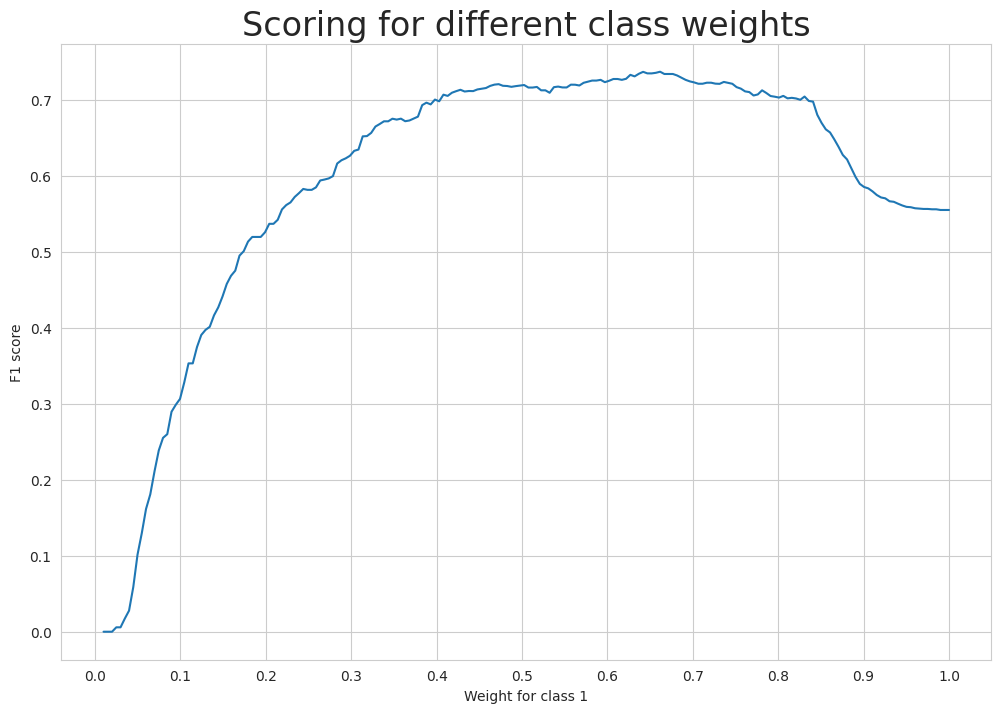

In [38]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2).fit(trainX, trainY)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(x=weigh_data['weight'], y=weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

# W&B

In [2]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /home/ubuntu/.netrc


True

In [11]:
import wandb
from wandb.sklearn import plot_precision_recall, plot_feature_importances
from wandb.sklearn import plot_class_proportions, plot_learning_curve, plot_roc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

X = pd.read_csv('static/trainX.csv')
y = pd.read_csv('static/trainY.csv')['Survived'] 

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

model = LogisticRegression()
model.fit(X_train, y_train)
model_params = model.get_params()

y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)[:, 1]

run = wandb.init(project="hw3", config=model_params)

run.config.update(
    {
        "test_size": test_size,
        "train_len": len(X_train),
        "test_len": len(X_test),
    }
)

# Plot relevant metrics
plot_class_proportions(y_train, y_test)
plot_learning_curve(model, X_train, y_train)
plot_roc(y_test, y_probas)
plot_precision_recall(y_test, y_probas)
plot_feature_importances(model, X.columns)

# Finish the W&B run
run.finish()


/home/ubuntu/gist/hw3/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/ubuntu/gist/hw3/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/gist/hw3/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

TypeError: Singleton array array(0.89659866) cannot be considered a valid collection.